In [15]:
import turicreate as tc
import pandas as pd

actions = pd.read_csv('./ucl_actions.csv')

actions[['user_id', 'listing_id']].to_csv('./ucl_actions_no_index.csv', index=False)

actions = tc.SFrame.read_csv('./ucl_actions_no_index.csv')
training_data, validation_data = tc.recommender.util.random_split_by_user(actions, 'user_id', 'listing_id')
model = tc.recommender.create(training_data, 'user_id', 'listing_id')

results = model.recommend()

results.save('.results.csv', format='csv')

Finished parsing file /opt/foxbots/ucl_actions_no_index.csv

Parsing completed. Parsed 100 lines in 0.359128 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /opt/foxbots/ucl_actions_no_index.csv

Parsing completed. Parsed 332592 lines in 0.228778 secs.

Recsys training: model = item_similarity

Preparing data set.

Data has 328172 observations with 14444 users and 14717 items.

Data prepared in: 0.192287s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 590us                          | 20.75      |

| 6.537ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 549.612ms                           | 0                | 1               |

| 1.37s                               | 100              | 14717           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.4015s

recommendations finished on 1000/14444 queries. users per second: 13311.3

recommendations finished on 2000/14444 queries. users per second: 13288

recommendations finished on 3000/14444 queries. users per second: 13035.3

recommendations finished on 4000/14444 queries. users per second: 13040.9

recommendations finished on 5000/14444 queries. users per second: 13012.1

recommendations finished on 6000/14444 queries. users per second: 12749.8

recommendations finished on 7000/14444 queries. users per second: 12576.4

recommendations finished on 8000/14444 queries. users per second: 12553.6

recommendations finished on 9000/14444 queries. users per second: 12536.1

recommendations finished on 10000/14444 queries. users per second: 12560.8

recommendations finished on 11000/14444 queries. users per second: 12545

recommendations finished on 12000/14444 queries. users per second: 12516.5

recommendations finished on 13000/14444 queries. users per second: 12531.4

recommendations finished on 14000/14444 queries. users per second: 12507.5

In [16]:
df = pd.read_csv('.results.csv')
df.head()

,user_id,listing_id,score,rank
0,0002338f-445b-4d4a-8719-61e06cf2d356,2FABP7BV3BX152726WWWEGDP00120180203,0.279856,1
1,0002338f-445b-4d4a-8719-61e06cf2d356,2FAHP71V38X109430WWWEGDP00120180203,0.259125,2
2,0002338f-445b-4d4a-8719-61e06cf2d356,2FABP7BV6BX1444910C46EJJ00120171220,0.256742,3
3,0002338f-445b-4d4a-8719-61e06cf2d356,2FABP7BV1BX149419ERLLPBI00120171227,0.237354,4
4,0002338f-445b-4d4a-8719-61e06cf2d356,2FAHP71V88X1353890C46EJJ00120180121,0.235842,5


In [17]:
sample_user_ids = df.user_id.unique()[:5]

In [18]:
for user_id in sample_user_ids:
    print('User ID: {}'.format(user_id))
    print('Number of interactions in validation data set: {}'.format(len(training_data[training_data['user_id'] == user_id])))

User ID: 0002338f-445b-4d4a-8719-61e06cf2d356
Number of interactions in validation data set: 61
User ID: 0005d343-b8c1-4aee-a3ec-f70b82217d7e
Number of interactions in validation data set: 25
User ID: 000a378a-ce38-4202-86ce-d50bd1afc360
Number of interactions in validation data set: 15
User ID: 005a6586-a5ee-4fce-8fb0-49fd7175463f
Number of interactions in validation data set: 22
User ID: 005d6286-c9cc-4f1a-a5be-c9b85f346964
Number of interactions in validation data set: 13


┌─────────────────────────────────────────────┐
│User ID: 0002338f-445b-4d4a-8719-61e06cf2d356│
└─────────────────────────────────────────────┘
Sampled Listings For User:
Listing ID: 2FAFP71W56X1525180C46EJJ00120180108
VIN: 2FAFP71W56X152518, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2006, Wholesale Price: 1550, FSBO Price: 2360, Consumer Retail Price: 3550


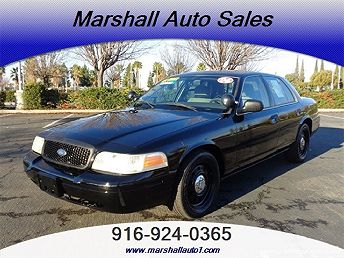


Listing ID: 2FAFP71VX8X105284NKLUSOBIF120180124
VIN: 2FAFP71VX8X105284, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2008, Wholesale Price: 2960, FSBO Price: 4850, Consumer Retail Price: 6080


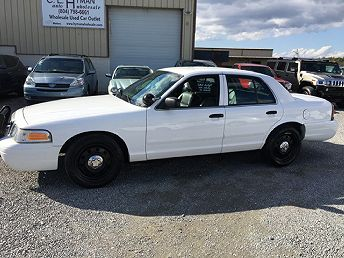


Listing ID: 2FAHP71V59X118468ERLLPBI00120180110
VIN: 2FAHP71V59X118468, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2009, Wholesale Price: 3170, FSBO Price: 5240, Consumer Retail Price: 6480


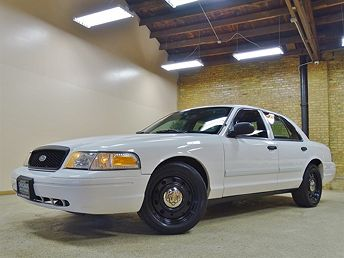


Listing ID: 2FABP7BV0BX168706ERLLPBI00120180114
VIN: 2FABP7BV0BX168706, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2011, Wholesale Price: 7160, FSBO Price: 9050, Consumer Retail Price: 10270


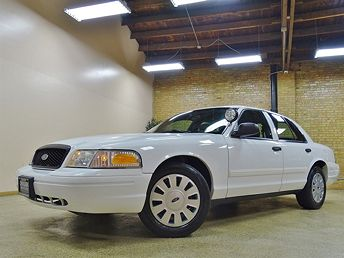


Listing ID: 2FABP7BV7BX152728WWWEGDP00120180203
VIN: 2FABP7BV7BX152728, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2011, Wholesale Price: 6800, FSBO Price: 8680, Consumer Retail Price: 9900


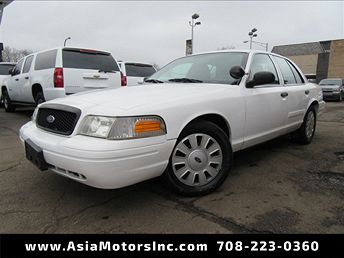


Predicted Listings:
Predicted Listing ID: 2FABP7BV3BX152726WWWEGDP00120180203
VIN: 2FABP7BV3BX152726, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2011, Wholesale Price: 5690, FSBO Price: 7590, Consumer Retail Price: 8810


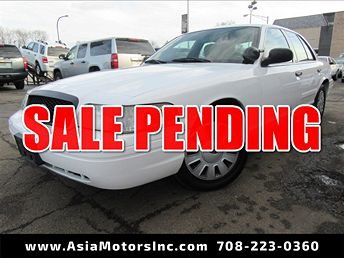


Predicted Listing ID: 2FAHP71V38X109430WWWEGDP00120180203
VIN: 2FAHP71V38X109430, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2008, Wholesale Price: 3870, FSBO Price: 6410, Consumer Retail Price: 7640


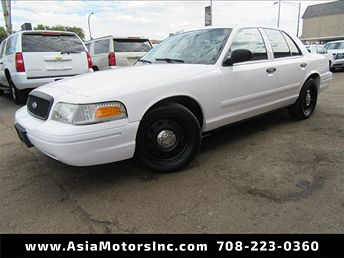


Predicted Listing ID: 2FABP7BV6BX1444910C46EJJ00120171220
VIN: 2FABP7BV6BX144491, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2011, Wholesale Price: 3010, FSBO Price: 4960, Consumer Retail Price: 6140
Predicted Listing ID: 2FABP7BV1BX149419ERLLPBI00120171227
VIN: 2FABP7BV1BX149419, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2011, Wholesale Price: 4500, FSBO Price: 6310, Consumer Retail Price: 7510


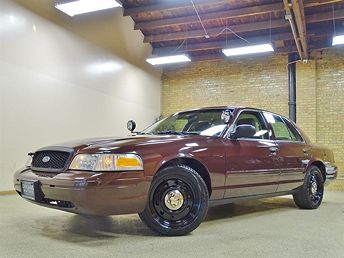


Predicted Listing ID: 2FAHP71V88X1353890C46EJJ00120180121
VIN: 2FAHP71V88X135389, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2008, Wholesale Price: 2190, FSBO Price: 3630, Consumer Retail Price: 4860


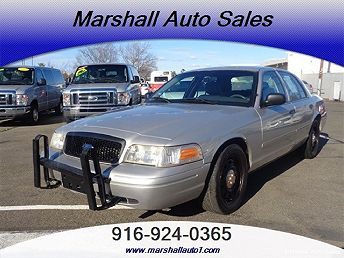


Predicted Listing ID: 2FABP7BV6BX135418ERLLPBI00120180201
VIN: 2FABP7BV6BX135418, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2011, Wholesale Price: 2320, FSBO Price: 4220, Consumer Retail Price: 5450


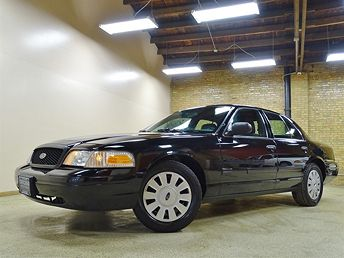


Predicted Listing ID: 2FABP7BV8BX1580050C46EJJ00120180122
VIN: 2FABP7BV8BX158005, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2011, Wholesale Price: 2510, FSBO Price: 4470, Consumer Retail Price: 5650


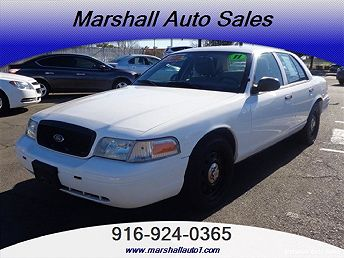


Predicted Listing ID: 2FABP7BV7BX124623ERLLPBI00120180120
VIN: 2FABP7BV7BX124623, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2011, Wholesale Price: 4270, FSBO Price: 6140, Consumer Retail Price: 7390


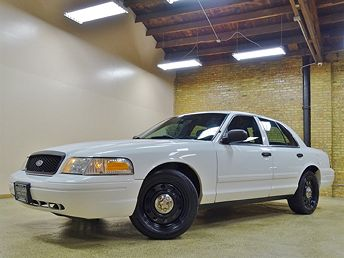


Predicted Listing ID: 2FAFP71VX8X179451RDUGJ0D00120171130
VIN: 2FAFP71VX8X179451, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2008, Wholesale Price: 2610, FSBO Price: 4280, Consumer Retail Price: 5500


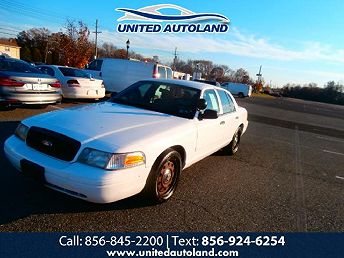


Predicted Listing ID: 2FABP7BV7BX171781ERLLPBI00120171119
VIN: 2FABP7BV7BX171781, Body Type: Sedan 4 DR, Make: FORD, Model: CROWN VICTORIA POLICE INT, Year: 2011, Wholesale Price: 4910, FSBO Price: 6800, Consumer Retail Price: 8000


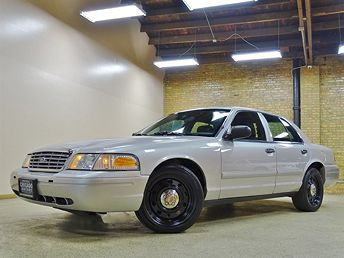



┌─────────────────────────────────────────────┐
│User ID: 0005d343-b8c1-4aee-a3ec-f70b82217d7e│
└─────────────────────────────────────────────┘
Sampled Listings For User:
Listing ID: 1HGCT2A89HA002017UHX09ETRG120180109
VIN: 1HGCT2A89HA002017, Body Type: Coupe, Make: HONDA, Model: ACCORD EX-L, Year: 2017, Wholesale Price: 19710, FSBO Price: 22260, Consumer Retail Price: 23540


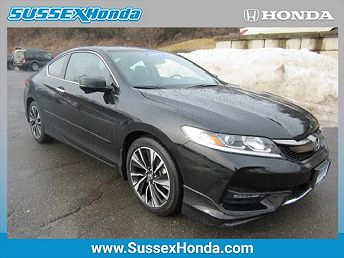


Listing ID: 1HGCT2B83FA008388I8XXQLT00120180120
VIN: 1HGCT2B83FA008388, Body Type: Coupe, Make: HONDA, Model: ACCORD EX-L, Year: 2015, Wholesale Price: 16860, FSBO Price: 18560, Consumer Retail Price: 19830


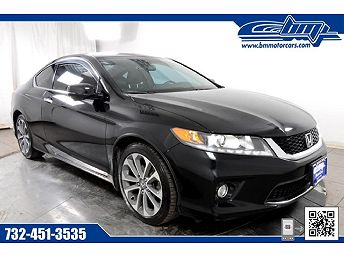


Listing ID: 1HGCT2B85FA006383Y8TU3C7CEL20171210
VIN: 1HGCT2B85FA006383, Body Type: Coupe, Make: HONDA, Model: ACCORD EX-L, Year: 2015, Wholesale Price: 17440, FSBO Price: 19180, Consumer Retail Price: 20440


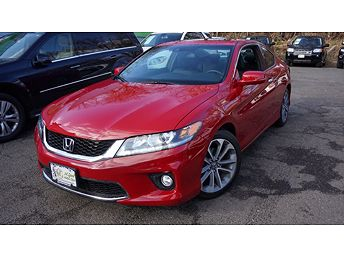


Listing ID: 1HGCT2B82GA006617HYLJTSJ00120171216
VIN: 1HGCT2B82GA006617, Body Type: Coupe, Make: HONDA, Model: ACCORD EX-L, Year: 2016, Wholesale Price: 19240, FSBO Price: 21550, Consumer Retail Price: 22810
Listing ID: 3FA6P0H90FR217300GM8YDGANEU20180201
VIN: 3FA6P0H90FR217300, Body Type: Sedan 4 DR, Make: FORD, Model: FUSION SE, Year: 2015, Wholesale Price: 13070, FSBO Price: 13620, Consumer Retail Price: 14940


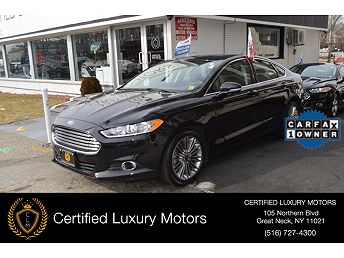


Predicted Listings:
Predicted Listing ID: 1HGCR2F75FA068530KJ17ZJZEMN20180111
VIN: 1HGCR2F75FA068530, Body Type: Sedan 4 DR, Make: HONDA, Model: ACCORD EX, Year: 2015, Wholesale Price: 14470, FSBO Price: 15480, Consumer Retail Price: 17250


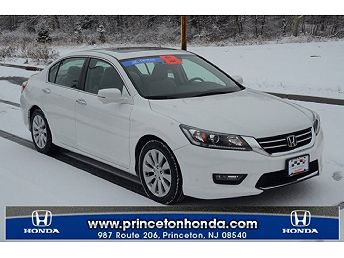


Predicted Listing ID: 1HGCR3F84FA012691KJ17ZJZEMN20180111
VIN: 1HGCR3F84FA012691, Body Type: Sedan 4 DR, Make: HONDA, Model: ACCORD EX-L, Year: 2015, Wholesale Price: 15380, FSBO Price: 17050, Consumer Retail Price: 18950


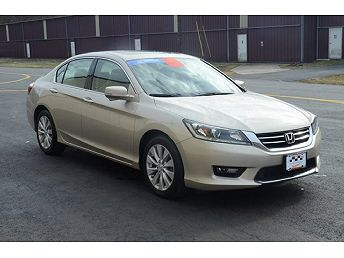


Predicted Listing ID: 1HGCR2F86DA255992GFHYVZI00120180103
VIN: 1HGCR2F86DA255992, Body Type: Sedan 4 DR, Make: HONDA, Model: ACCORD EX-L, Year: 2013, Wholesale Price: 14310, FSBO Price: 16020, Consumer Retail Price: 17310


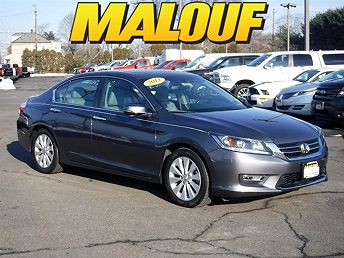


Predicted Listing ID: 1HGCR2F38FA236772FJHPOZN00120180104
VIN: 1HGCR2F38FA236772, Body Type: Sedan 4 DR, Make: HONDA, Model: ACCORD LX, Year: 2015, Wholesale Price: 14410, FSBO Price: 15270, Consumer Retail Price: 16410


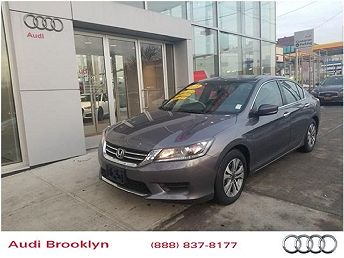


Predicted Listing ID: 1HGCR3F97DA0412984MBOJZV65120171230
VIN: 1HGCR3F97DA041298, Body Type: Sedan 4 DR, Make: HONDA, Model: ACCORD TOURING, Year: 2013, Wholesale Price: 14430, FSBO Price: 17060, Consumer Retail Price: 19120


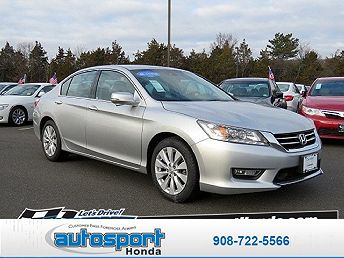


Predicted Listing ID: 1HGCR2F83EA3040341H54H9RYR120171221
VIN: 1HGCR2F83EA304034, Body Type: Sedan 4 DR, Make: HONDA, Model: ACCORD EX-L, Year: 2014, Wholesale Price: 15340, FSBO Price: 16540, Consumer Retail Price: 18400


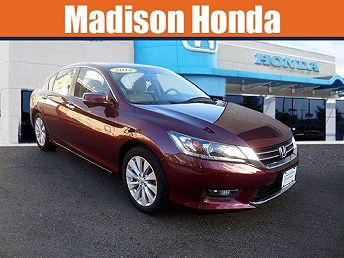


Predicted Listing ID: 1HGCR3F81FA0188361H54H9RYR120171231
VIN: 1HGCR3F81FA018836, Body Type: Sedan 4 DR, Make: HONDA, Model: ACCORD EX-L, Year: 2015, Wholesale Price: 17390, FSBO Price: 19130, Consumer Retail Price: 21050


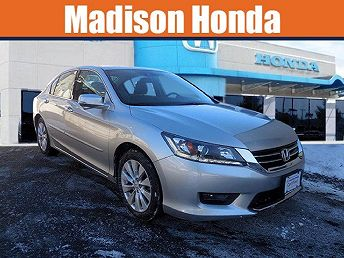


Predicted Listing ID: 1HGCT1B84FA011441Y8TU3C7CEL20171210
VIN: 1HGCT1B84FA011441, Body Type: Coupe, Make: HONDA, Model: ACCORD EX-L, Year: 2015, Wholesale Price: 15210, FSBO Price: 16530, Consumer Retail Price: 17750


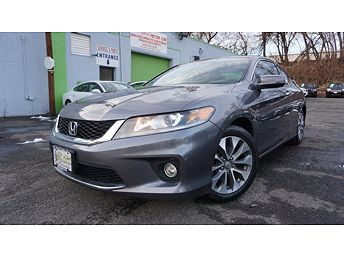


Predicted Listing ID: 1HGCR2F8XHA015026TG4IXYHSOT20180125
VIN: 1HGCR2F8XHA015026, Body Type: Sedan 4 DR, Make: HONDA, Model: ACCORD EX-L, Year: 2017, Wholesale Price: 19410, FSBO Price: 21870, Consumer Retail Price: 23140


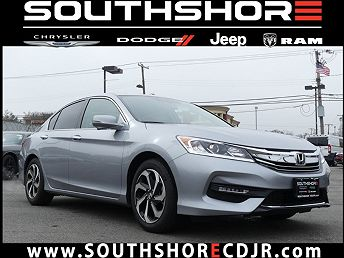


Predicted Listing ID: 1HGCT1B89FA002816Y8TU3C7CEL20171210
VIN: 1HGCT1B89FA002816, Body Type: Coupe, Make: HONDA, Model: ACCORD EX-L, Year: 2015, Wholesale Price: 14930, FSBO Price: 16140, Consumer Retail Price: 17410


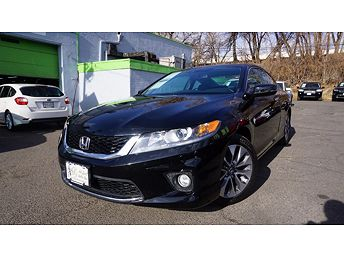



┌─────────────────────────────────────────────┐
│User ID: 000a378a-ce38-4202-86ce-d50bd1afc360│
└─────────────────────────────────────────────┘
Sampled Listings For User:
Listing ID: SHHEP33573U4044753QWRRT38B120180131
VIN: SHHEP33573U404475, Body Type: Hatchback 2 DR, Make: HONDA, Model: CIVIC SI, Year: 2003, Wholesale Price: 2010, FSBO Price: 3800, Consumer Retail Price: 4730
Listing ID: SHHEP33573U4044753QWRRT38B120180131
VIN: SHHEP33573U404475, Body Type: Hatchback 2 DR, Make: HONDA, Model: CIVIC SI, Year: 2003, Wholesale Price: 2010, FSBO Price: 3800, Consumer Retail Price: 4730
Listing ID: SHHEP33573U4044753QWRRT38B120180131
VIN: SHHEP33573U404475, Body Type: Hatchback 2 DR, Make: HONDA, Model: CIVIC SI, Year: 2003, Wholesale Price: 2010, FSBO Price: 3800, Consumer Retail Price: 4730
Listing ID: SHHEP33573U4044753QWRRT38B120180131
VIN: SHHEP33573U404475, Body Type: Hatchback 2 DR, Make: HONDA, Model: CIVIC SI, Year: 2003, Wholesale Price: 2010, FSBO Price: 3800, Consumer Retail

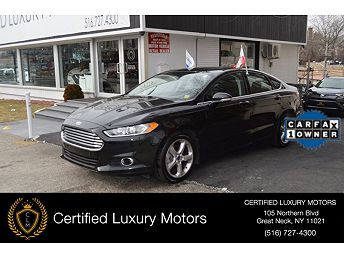


Predicted Listing ID: 3FA6P0H90FR217300GM8YDGANEU20180201
VIN: 3FA6P0H90FR217300, Body Type: Sedan 4 DR, Make: FORD, Model: FUSION SE, Year: 2015, Wholesale Price: 13070, FSBO Price: 13620, Consumer Retail Price: 14940


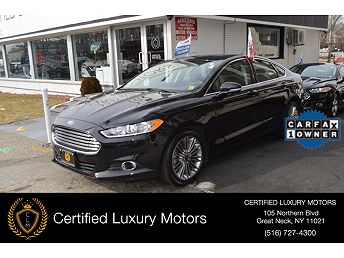


Predicted Listing ID: 19VDE1F74FE009175GM8YDGANEU20171207
VIN: 19VDE1F74FE009175, Body Type: Sedan 4 DR, Make: ACURA, Model: ILX 20 TECH, Year: 2015, Wholesale Price: 17300, FSBO Price: 17860, Consumer Retail Price: 18980


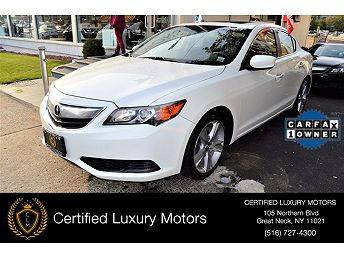


Predicted Listing ID: 3FA6P0HD1FR188605GM8YDGANEU20180201
VIN: 3FA6P0HD1FR188605, Body Type: Sedan 4 DR, Make: FORD, Model: FUSION SE, Year: 2015, Wholesale Price: 12750, FSBO Price: 13320, Consumer Retail Price: 14640


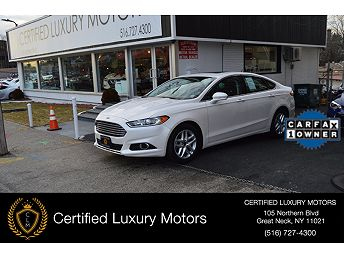


Predicted Listing ID: 5N1AL0MM3EC549458GM8YDGANEU20180126
VIN: 5N1AL0MM3EC549458, Body Type: 4 Door Wagon/Sport Utility, Make: INFINITI, Model: QX60, Year: 2014, Wholesale Price: 27810, FSBO Price: 28380, Consumer Retail Price: 29900


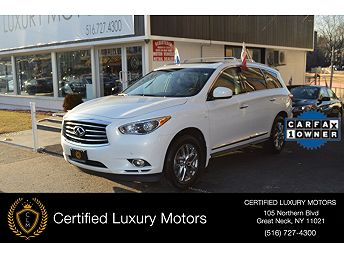


Predicted Listing ID: 2T1BURHE9FC317372GM8YDGANEU20180201
VIN: 2T1BURHE9FC317372, Body Type: Sedan 4 DR, Make: TOYOTA, Model: COROLLA L SERIES/S SERIES, Year: 2015, Wholesale Price: 11330, FSBO Price: 13130, Consumer Retail Price: 14330


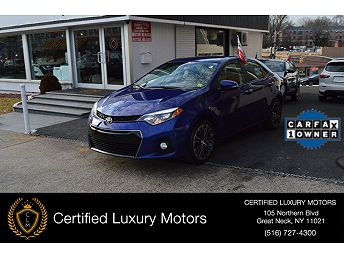


Predicted Listing ID: 2T3RFREVXGW413046GM8YDGANEU20180203
VIN: 2T3RFREVXGW413046, Body Type: 4 Door Wagon/Sport Utility, Make: TOYOTA, Model: RAV4 XLE, Year: 2016, Wholesale Price: 17740, FSBO Price: 20110, Consumer Retail Price: 21440


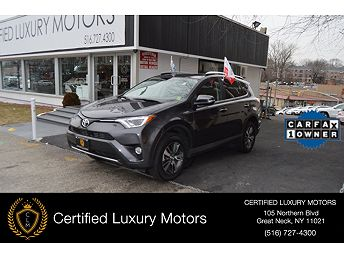


Predicted Listing ID: 2T3BFREV4FW267002GM8YDGANEU20180202
VIN: 2T3BFREV4FW267002, Body Type: 4 Door Wagon/Sport Utility, Make: TOYOTA, Model: RAV4 LE, Year: 2015, Wholesale Price: 14580, FSBO Price: 17030, Consumer Retail Price: 18110


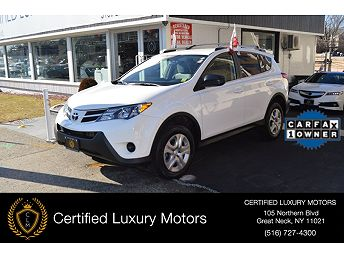


Predicted Listing ID: 1C4PJMDS0EW277427GM8YDGANEU20171104
VIN: 1C4PJMDS0EW277427, Body Type: 4 Door Wagon/Sport Utility, Make: JEEP, Model: CHEROKEE LIMITED, Year: 2014, Wholesale Price: 15730, FSBO Price: 19020, Consumer Retail Price: 20580


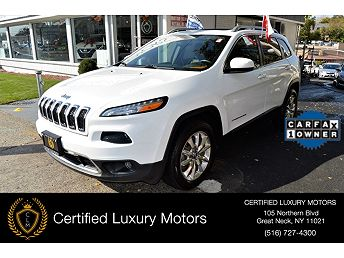


Predicted Listing ID: 1C4PJMDBXFW599803GM8YDGANEU20180126
VIN: 1C4PJMDBXFW599803, Body Type: 4 Door Wagon/Sport Utility, Make: JEEP, Model: CHEROKEE LIMITED, Year: 2015, Wholesale Price: 16310, FSBO Price: 19690, Consumer Retail Price: 21070


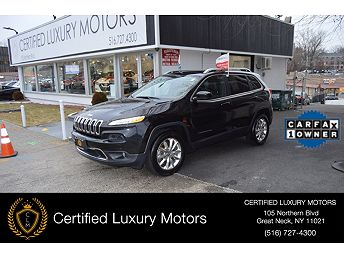



┌─────────────────────────────────────────────┐
│User ID: 005a6586-a5ee-4fce-8fb0-49fd7175463f│
└─────────────────────────────────────────────┘
Sampled Listings For User:
Listing ID: 1G1AS58H297232344GOY7BEVD2V20171220
VIN: 1G1AS58H297232344, Body Type: Sedan 4 DR, Make: CHEVROLET, Model: COBALT LS, Year: 2009, Wholesale Price: 3000, FSBO Price: 4420, Consumer Retail Price: 5330


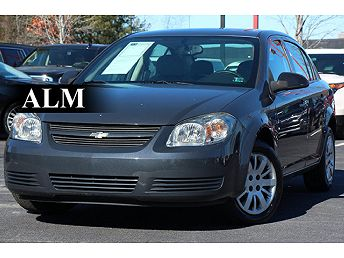


Listing ID: 1G1AS58H297232344GOY7BEVD2V20171220
VIN: 1G1AS58H297232344, Body Type: Sedan 4 DR, Make: CHEVROLET, Model: COBALT LS, Year: 2009, Wholesale Price: 3000, FSBO Price: 4420, Consumer Retail Price: 5330


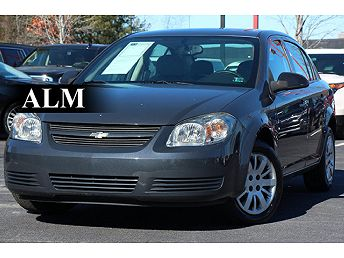


Listing ID: WDBNG70J74A394484PPKHJWF00120180202
VIN: WDBNG70J74A394484, Body Type: Sedan 4 DR, Make: MERCEDES-BENZ, Model: S430, Year: 2004, Wholesale Price: 3800, FSBO Price: 5520, Consumer Retail Price: 6440


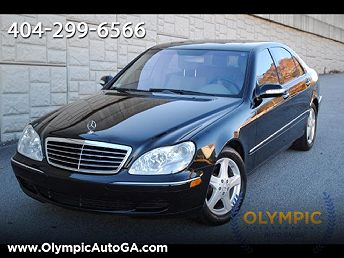


Listing ID: 1G1ZG57B88F205817VTIHUGBKCT20180111
VIN: 1G1ZG57B88F205817, Body Type: Sedan 4 DR, Make: CHEVROLET, Model: MALIBU LS, Year: 2008, Wholesale Price: 2640, FSBO Price: 3550, Consumer Retail Price: 4760


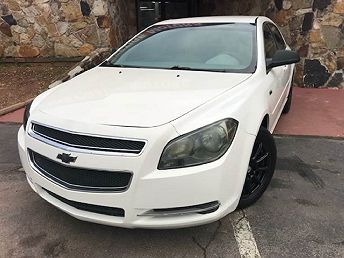


Listing ID: 1G1AS58H297232344GOY7BEVD2V20171220
VIN: 1G1AS58H297232344, Body Type: Sedan 4 DR, Make: CHEVROLET, Model: COBALT LS, Year: 2009, Wholesale Price: 3000, FSBO Price: 4420, Consumer Retail Price: 5330


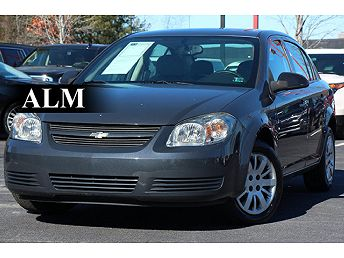


Predicted Listings:
Predicted Listing ID: 1G1PH5S9XB7225884AQKLTEL00120180202
VIN: 1G1PH5S9XB7225884, Body Type: Sedan 4 DR, Make: CHEVROLET, Model: CRUZE LTZ, Year: 2011, Wholesale Price: 2590, FSBO Price: 3080, Consumer Retail Price: 4320
Predicted Listing ID: 3MEHM08156R6516673R4NOH800120180131
VIN: 3MEHM08156R651667, Body Type: Sedan 4 DR, Make: MERCURY, Model: MILAN PREMIER, Year: 2006, Wholesale Price: 2890, FSBO Price: 3810, Consumer Retail Price: 5010


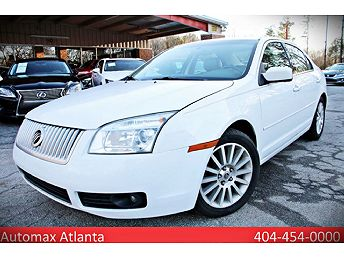


Predicted Listing ID: 1FAHP3FN3AW267172EFLRLEL00120180119
VIN: 1FAHP3FN3AW267172, Body Type: Sedan 4 DR, Make: FORD, Model: FOCUS SE, Year: 2010, Wholesale Price: 3120, FSBO Price: 4440, Consumer Retail Price: 5390
Predicted Listing ID: 19UUA66265A0382168I67D0N00120180109
VIN: 19UUA66265A038216, Body Type: Sedan 4 DR, Make: ACURA, Model: TL, Year: 2005, Wholesale Price: 3330, FSBO Price: 4700, Consumer Retail Price: 5930


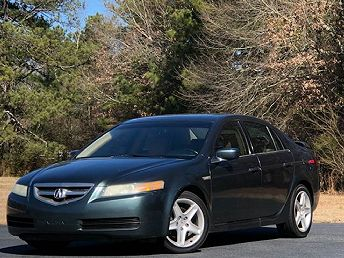


Predicted Listing ID: 1N4AL21E08C2290198I67D0N00120180109
VIN: 1N4AL21E08C229019, Body Type: Sedan 4 DR, Make: NISSAN, Model: ALTIMA 2.5/2.5 S/2.5 SL, Year: 2008, Wholesale Price: 3580, FSBO Price: 4630, Consumer Retail Price: 5870


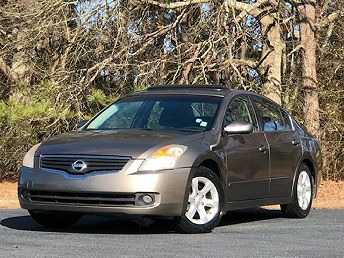


Predicted Listing ID: 3N1AB61E98L7086337QIDHI200120171112
VIN: 3N1AB61E98L708633, Body Type: Sedan 4 DR, Make: NISSAN, Model: SENTRA 2.0/2.0S/2.0SL, Year: 2008, Wholesale Price: 2260, FSBO Price: 3640, Consumer Retail Price: 4540


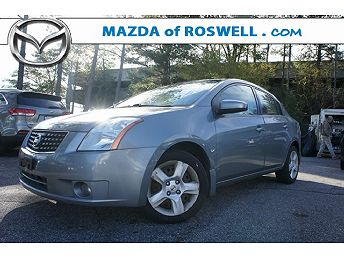


Predicted Listing ID: 1C3BC1FB6BN575261INZO9GQVM120180116
VIN: 1C3BC1FB6BN575261, Body Type: Sedan 4 DR, Make: CHRYSLER, Model: 200 TOURING, Year: 2011, Wholesale Price: 3810, FSBO Price: 4530, Consumer Retail Price: 5690


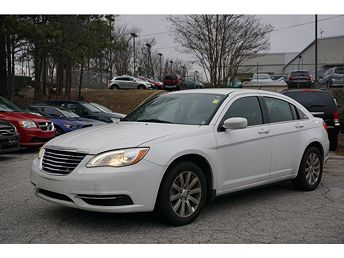


Predicted Listing ID: 1N4AL21E59N529922INZO9GQVM120180201
VIN: 1N4AL21E59N529922, Body Type: Sedan 4 DR, Make: NISSAN, Model: ALTIMA 2.5/2.5 S, Year: 2009, Wholesale Price: 3030, FSBO Price: 3990, Consumer Retail Price: 5210
Predicted Listing ID: 1G6DM56T650188635I7K3H4500120171114
VIN: 1G6DM56T650188635, Body Type: Sedan 4 DR, Make: CADILLAC, Model: CTS, Year: 2005, Wholesale Price: 1990, FSBO Price: 3200, Consumer Retail Price: 4280


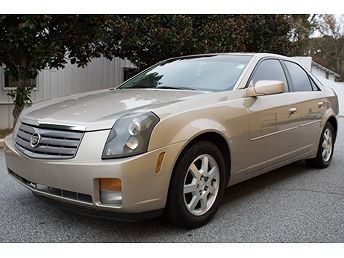


Predicted Listing ID: WBAPK53529A643905HNF0DM700120180131
VIN: WBAPK53529A643905, Body Type: Sedan 4 DR, Make: BMW, Model: 328XI SULEV, Year: 2009, Wholesale Price: 6630, FSBO Price: 8180, Consumer Retail Price: 9700


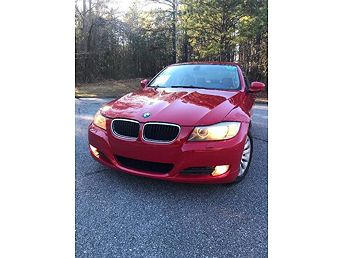



┌─────────────────────────────────────────────┐
│User ID: 005d6286-c9cc-4f1a-a5be-c9b85f346964│
└─────────────────────────────────────────────┘
Sampled Listings For User:
Listing ID: 1GNET13H4822206082TB4DCN00120171017
VIN: 1GNET13H482220608, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2008, Wholesale Price: 12350, FSBO Price: 17570, Consumer Retail Price: 18490


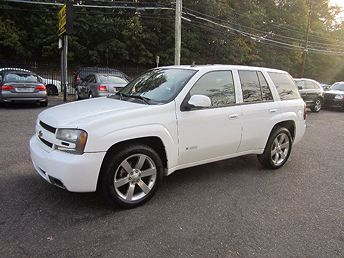


Listing ID: 1GNET13HX82257209HHGMQQS00120171228
VIN: 1GNET13HX82257209, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2008, Wholesale Price: 10430, FSBO Price: 14880, Consumer Retail Price: 15830


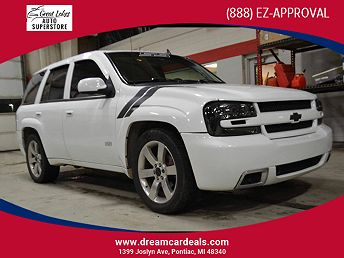


Listing ID: 1GNET13H4822206082TB4DCN00120171017
VIN: 1GNET13H482220608, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2008, Wholesale Price: 12350, FSBO Price: 17570, Consumer Retail Price: 18490


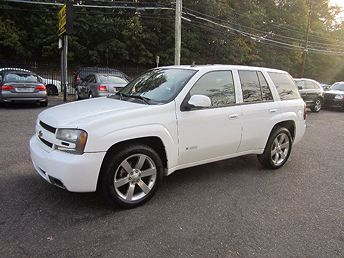


Listing ID: 1GYFK63838R146886VOAOIOV00120171114
VIN: 1GYFK63838R146886, Body Type: 4 Door Wagon/Sport Utility, Make: CADILLAC, Model: ESCALADE LUXURY, Year: 2008, Wholesale Price: 12800, FSBO Price: 16310, Consumer Retail Price: 18990


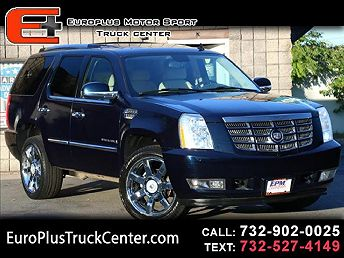


Listing ID: 1GNET13H782112452N1TUKBL08120180116
VIN: 1GNET13H782112452, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2008, Wholesale Price: 13190, FSBO Price: 18690, Consumer Retail Price: 19670


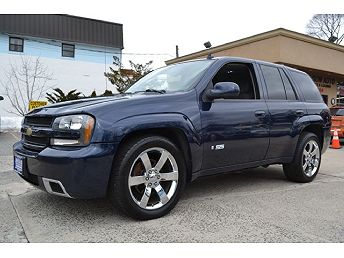


Predicted Listings:
Predicted Listing ID: 1GNET13HX82257856HVNTHFW00120171005
VIN: 1GNET13HX82257856, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2008, Wholesale Price: 12340, FSBO Price: 17560, Consumer Retail Price: 18480
Predicted Listing ID: 1GNET13H082113054PVVABSD00120180131
VIN: 1GNET13H082113054, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2008, Wholesale Price: 14200, FSBO Price: 20040, Consumer Retail Price: 21100


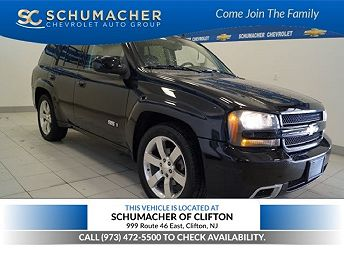


Predicted Listing ID: 1GNET13H872269857NQPXQ5H00120180125
VIN: 1GNET13H872269857, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2007, Wholesale Price: 8880, FSBO Price: 12760, Consumer Retail Price: 13680


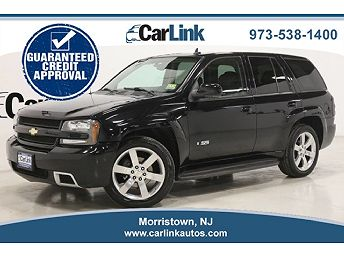


Predicted Listing ID: 1GNET13H5721911515SXRUW900120171110
VIN: 1GNET13H572191151, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2007, Wholesale Price: 11120, FSBO Price: 15890, Consumer Retail Price: 16790


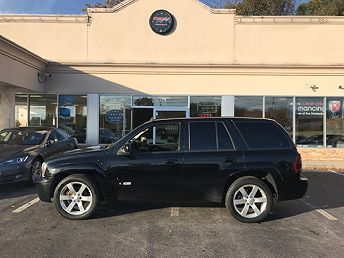


Predicted Listing ID: 1GNDS13S852387642ZZ0KMJKXGN20180128
VIN: 1GNDS13S852387642, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER LS/LT, Year: 2005, Wholesale Price: 1980, FSBO Price: 3170, Consumer Retail Price: 4130
Predicted Listing ID: 1GNES13H582150541IXJ1M7ZPJY20180201
VIN: 1GNES13H582150541, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2008, Wholesale Price: 8530, FSBO Price: 12290, Consumer Retail Price: 13190
Predicted Listing ID: 1GNET13H272272656BNH9BFSMD120171126
VIN: 1GNET13H272272656, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2007, Wholesale Price: 10930, FSBO Price: 15550, Consumer Retail Price: 16520


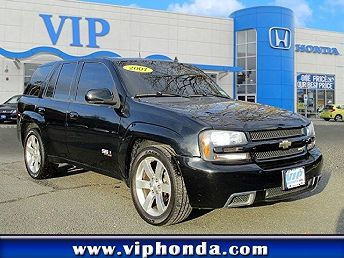


Predicted Listing ID: 1GNET13H782179116WTGPXTM00120171228
VIN: 1GNET13H782179116, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2008, Wholesale Price: 10740, FSBO Price: 15290, Consumer Retail Price: 16260


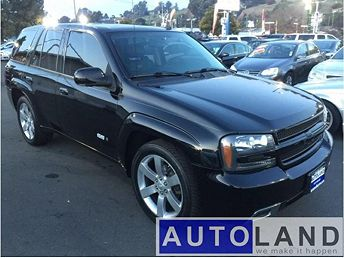


Predicted Listing ID: 1GYS4CEF0ER164521RYY4L00120180103
VIN: 1GYS4CEF0ER164521, Body Type: 4 Door Wagon/Sport Utility, Make: CADILLAC, Model: ESCALADE PREMIUM, Year: 2014, Wholesale Price: 38450, FSBO Price: 41300, Consumer Retail Price: 46280


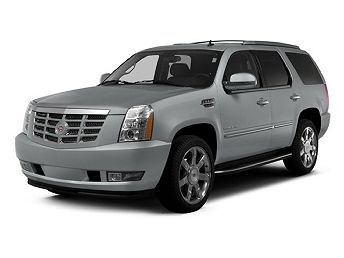


Predicted Listing ID: 1GNET13H272254562QQGK2GKDAN20180113
VIN: 1GNET13H272254562, Body Type: 4 Door Wagon/Sport Utility, Make: CHEVROLET, Model: TRAILBLAZER SS, Year: 2007, Wholesale Price: 11610, FSBO Price: 16600, Consumer Retail Price: 17470


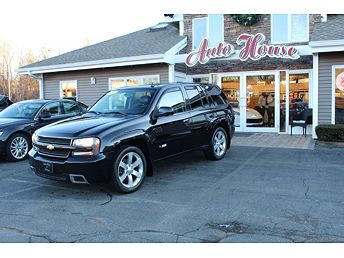

In [14]:
import requests
import numpy as np
import json
from lxml import html
from IPython.display import Image
from IPython.core.display import HTML

START = '\033[4m'
END = '\033[0m'

class color:
   BOLD = '\033[1m'
   END = '\033[0m'

def bordered(text):
    lines = text.splitlines()
    width = max(len(s) for s in lines)
    res = ['┌' + '─' * width + '┐']
    for s in lines:
        res.append('│' + (s + ' ' * width)[:width] + '│')
    res.append('└' + '─' * width + '┘')
    return '\n'.join(res)

for user_id in sample_user_ids:
    print(color.BOLD + bordered('User ID: {}'.format(user_id)) + color.END)
    print(color.BOLD + 'Sampled Listings For User:' + color.END)
    listing_ids = np.random.choice(training_data[training_data['user_id'] == user_id]['listing_id'].unique().to_numpy(), 5)
    for listing_id in listing_ids:
        formattedListingId = '{}Listing ID: {}{}'.format(START,listing_id,END)
        print(formattedListingId)
        vin = listing_id[:17]
        resp = requests.post("https://www.carfax.com/value/price", json={'vin': vin, 'zip': '20120'}).json()
        vin_decode = resp['vinDecode']
        print('VIN: {}, Body Type: {}, Make: {}, Model: {}, Year: {}, Wholesale Price: {}, FSBO Price: {}, Consumer Retail Price: {}'.format(
            vin,
            vin_decode['bodyType'],
            vin_decode['make'],
            vin_decode['model'],
            vin_decode['modelYear'],
            resp['wholesalePrice'],
            resp['fsboPrice'],
            resp['consumerRetailPrice']
        ))
        resp = requests.get("https://www.carfax.com/api/vehicles/{}".format(vin))
        if resp.status_code == 200:
            display(Image('{}.jpg'.format(resp.json()['images']['medium'][0])))
            print()
    print(color.BOLD + 'Predicted Listings:' + color.END)
    predicted_listing_ids = df[df['user_id'] == user_id].listing_id
    for predicted_listing_id in predicted_listing_ids:
        print('{}Predicted Listing ID: {}{}'.format(START,predicted_listing_id,END))
        vin = predicted_listing_id[:17]
        resp = requests.post("https://www.carfax.com/value/price", json={'vin': vin, 'zip': '20120'}).json()
        vin_decode = resp['vinDecode']
        print('VIN: {}, Body Type: {}, Make: {}, Model: {}, Year: {}, Wholesale Price: {}, FSBO Price: {}, Consumer Retail Price: {}'.format(
            vin,
            vin_decode['bodyType'],
            vin_decode['make'],
            vin_decode['model'],
            vin_decode['modelYear'],
            resp['wholesalePrice'],
            resp['fsboPrice'],
            resp['consumerRetailPrice']
        ))
        resp = requests.get("https://www.carfax.com/api/vehicles/{}".format(vin))
        if resp.status_code == 200:
            display(Image('{}.jpg'.format(resp.json()['images']['medium'][0])))
            print()
    print()